In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Loading Cleaned Data

In [2]:
df = pd.read_csv('../../datasets/apartments_collective.csv')

# Data Processing for Machine Learning

In [3]:
df.head(50)

,Unnamed: 0,url,name/title,address,price,area,price-per-area,floor/store,no of floors/stores in the building,no of rooms,year of construction,parking space,market,form of ownership,location,latitude,longitude,distance,district
0,0,https://krakow.nieruchomosci-online.pl/mieszka...,Mieszkanie Kraków,"103171, Mistrzejowice, Kraków, małopolskie",1087000.0,74.80,14532.09,6,7,3,2016.0,True,wtórny,pełna własność,"Mistrzejowice, Kraków, województwo małopolskie...",50.097426,20.009603,6.500728,Mistrzejowice
1,1,https://krakow.nieruchomosci-online.pl/mieszka...,Mieszkanie Kraków,"2 Pułku Lotniczego, Kraków, małopolskie",550000.0,32.00,17187.50,4,8,1,2012.0,False,wtórny,pełna własność,"2, Osiedle 2 Pułku Lotniczego, Czyżyny, Kraków...",50.077806,20.012307,5.639111,Czyżyny
2,2,https://krakow.nieruchomosci-online.pl/mieszka...,Mieszkanie Kraków,"2 Pułku Lotniczego, Kraków, małopolskie",550000.0,32.30,17028.00,4,10,1,1985.0,False,wtórny,pełna własność,"2, Osiedle 2 Pułku Lotniczego, Czyżyny, Kraków...",50.077806,20.012307,5.639111,Czyżyny
3,3,https://krakow.nieruchomosci-online.pl/mieszka...,"Apartament, ul. 28 Lipca 1943","28 Lipca 1943, Wola Justowska, Kraków, małopol...",2290000.0,155.16,14758.96,0,2,5,2009.0,True,wtórny,pełna własność,"28 Lipca 1943, Wola Justowska, Zwierzyniec, Kr...",50.062710,19.872002,4.662523,Zwierzyniec
4,4,https://krakow.nieruchomosci-online.pl/mieszka...,"Mieszkanie, ul. 28 Lipca 1943","28 Lipca 1943, Wola Justowska, Kraków, małopol...",2399000.0,139.00,17258.99,1,2,3,2022.0,False,wtórny,pełna własność,"28 Lipca 1943, Wola Justowska, Zwierzyniec, Kr...",50.062710,19.872002,4.662523,Zwierzyniec
5,5,https://krakow.nieruchomosci-online.pl/mieszka...,"Apartament, ul. 28 Lipca 1943","28 Lipca 1943, Wola Justowska, Kraków, małopol...",2399000.0,146.68,16355.33,2,2,3,2002.0,True,wtórny,pełna własność,"28 Lipca 1943, Wola Justowska, Zwierzyniec, Kr...",50.062710,19.872002,4.662523,Zwierzyniec
6,6,https://www.otodom.pl/pl/oferta/nowe-mieszkani...,Nowe mieszkania na Górce Narodowej,"29 listopada - okolice, Górka Narodowa, Prądni...",778689.0,61.30,12703.00,1,5,2,2023.0,True,pierwotny,pełna własność,"Aleja 29 Listopada, Górka Narodowa, Prądnik Bi...",50.103296,19.963896,4.983478,Prądnik Biały
7,8,https://www.otodom.pl/pl/oferta/balkon-3-pokoj...,balkon + 3 pokoje + parking,"Adama Vetulaniego, Prądnik Biały, Prądnik Biał...",970000.0,55.00,17636.00,4,7,3,2023.0,True,wtórny,pełna własność,"Adama Vetulaniego, Prądnik Biały, Kraków, woje...",50.095951,19.924784,3.895335,Prądnik Biały
8,9,https://krakow.nieruchomosci-online.pl/mieszka...,"Kawalerka, ul. Agatowa","Agatowa 18, Bieżanów, Kraków, małopolskie",410000.0,28.00,14642.86,0,2,1,1997.0,False,wtórny,spółdzielcze wł. prawo do lokalu,"18, Agatowa, Złocień, Bieżanów-Prokocim, Krakó...",50.021853,20.050650,9.235760,Bieżanów-Prokocim
9,10,https://krakow.nieruchomosci-online.pl/mieszka...,"Mieszkanie, ul. Agatowa","Agatowa, Bieżanów, Kraków, małopolskie",765000.0,48.00,15937.50,3,4,3,2023.0,True,wtórny,pełna własność,"Agatowa, Osiedle Kolejowe, Złocień, Bieżanów-P...",50.022046,20.046131,8.943634,Bieżanów-Prokocim


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17932 entries, 0 to 17931
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           17932 non-null  int64  
 1   url                                  17932 non-null  object 
 2   name/title                           17932 non-null  object 
 3   address                              17932 non-null  object 
 4   price                                17932 non-null  float64
 5   area                                 17932 non-null  float64
 6   price-per-area                       17932 non-null  float64
 7   floor/store                          17932 non-null  int64  
 8   no of floors/stores in the building  17932 non-null  int64  
 9   no of rooms                          17932 non-null  int64  
 10  year of construction                 17932 non-null  float64
 11  parking space               

In [5]:
# Droping columns unnecessary/harmfull to model performance
# columns_to_drop = ['Unnamed: 0', 'url', 'name/title', 'address', 'location', 'latitude', 'longitude', 'price']
columns_to_drop = ['Unnamed: 0', 'url', 'name/title', 'address', 'location', 'price']

df = df.drop(columns=columns_to_drop)

In [6]:
df.head()

,area,price-per-area,floor/store,no of floors/stores in the building,no of rooms,year of construction,parking space,market,form of ownership,latitude,longitude,distance,district
0,74.80,14532.09,6,7,3,2016.0,True,wtórny,pełna własność,50.097426,20.009603,6.500728,Mistrzejowice
1,32.00,17187.50,4,8,1,2012.0,False,wtórny,pełna własność,50.077806,20.012307,5.639111,Czyżyny
2,32.30,17028.00,4,10,1,1985.0,False,wtórny,pełna własność,50.077806,20.012307,5.639111,Czyżyny
3,155.16,14758.96,0,2,5,2009.0,True,wtórny,pełna własność,50.062710,19.872002,4.662523,Zwierzyniec
4,139.00,17258.99,1,2,3,2022.0,False,wtórny,pełna własność,50.062710,19.872002,4.662523,Zwierzyniec


# Verifying Data Cleaning Process / Adapting data to model

## Missing Data

In [7]:
df.isnull().sum()

area                                   0
price-per-area                         0
floor/store                            0
no of floors/stores in the building    0
no of rooms                            0
year of construction                   0
parking space                          0
market                                 0
form of ownership                      0
latitude                               0
longitude                              0
distance                               0
district                               0
dtype: int64

## Outliers handling

In [8]:
df.describe().round(2)

,area,price-per-area,floor/store,no of floors/stores in the building,no of rooms,year of construction,latitude,longitude,distance
count,17932.00,17932.00,17932.00,17932.00,17932.00,17932.00,17932.00,17932.00,17932.00
mean,56.99,16813.15,2.35,4.79,2.59,2003.31,50.06,19.95,4.37
std,28.14,4701.30,2.12,2.41,1.06,35.30,0.03,0.05,2.50
min,10.27,19.14,-1.00,1.00,1.00,1300.00,49.98,19.80,0.04
25%,39.50,14000.00,1.00,3.00,2.00,2000.00,50.04,19.92,2.46
50%,51.01,16200.00,2.00,4.00,2.00,2018.00,50.06,19.95,3.99
75%,66.00,18611.03,3.00,6.00,3.00,2023.00,50.08,19.98,6.11
max,550.00,152594.09,15.00,18.00,44.00,2026.00,50.12,20.20,18.93


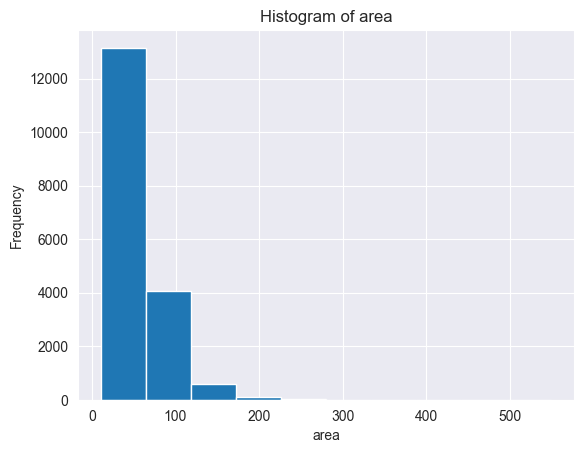

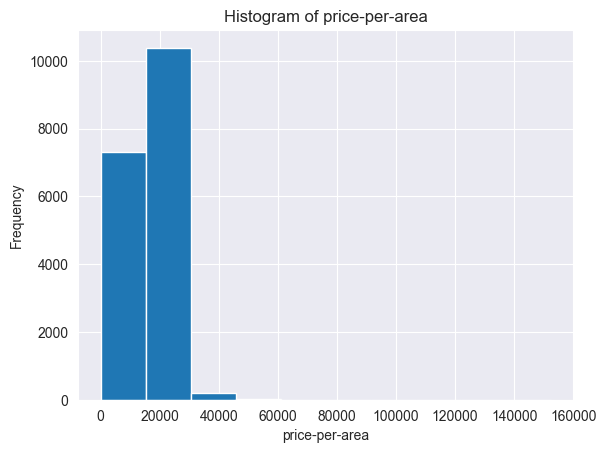

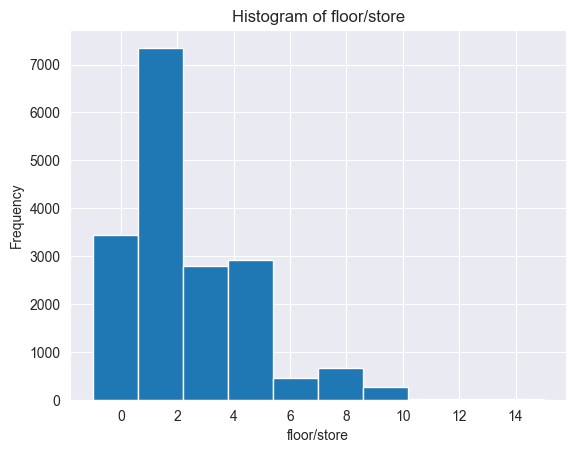

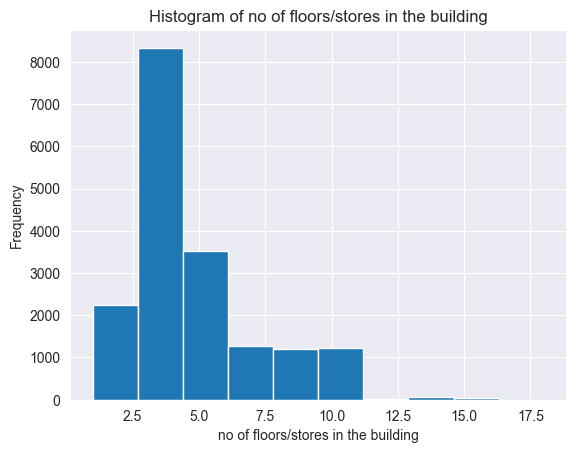

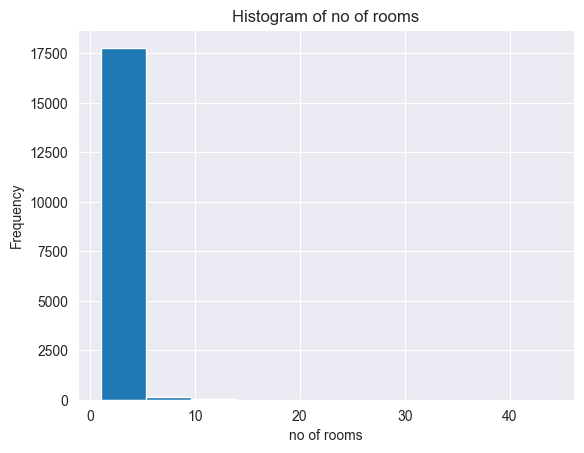

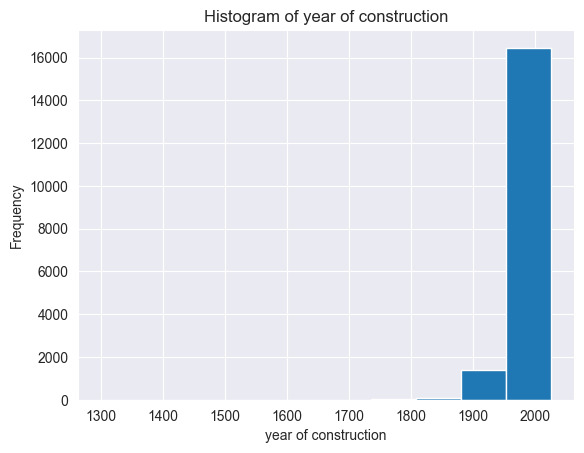

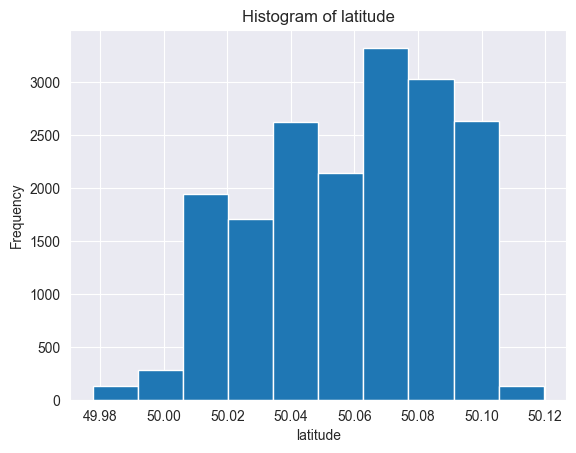

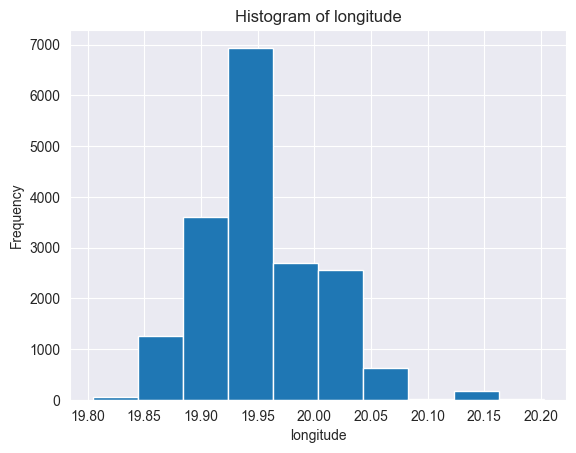

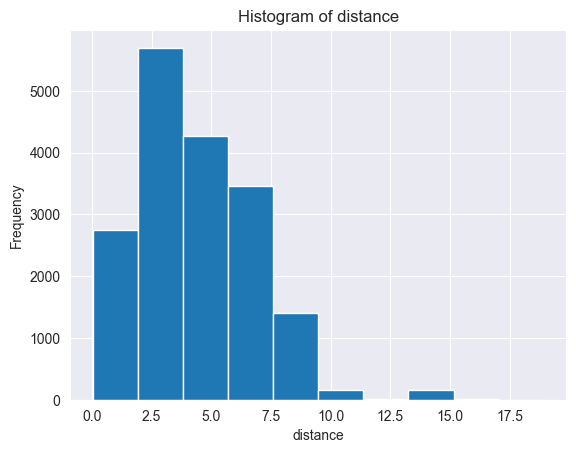

In [9]:
for column in df.select_dtypes(include=['number']).columns:
    plt.figure()
    df[column].plot(kind='hist', bins=10, title=f'Histogram of {column}')
    plt.xlabel(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [10]:
df.describe().round(2)

,area,price-per-area,floor/store,no of floors/stores in the building,no of rooms,year of construction,latitude,longitude,distance
count,17932.00,17932.00,17932.00,17932.00,17932.00,17932.00,17932.00,17932.00,17932.00
mean,56.99,16813.15,2.35,4.79,2.59,2003.31,50.06,19.95,4.37
std,28.14,4701.30,2.12,2.41,1.06,35.30,0.03,0.05,2.50
min,10.27,19.14,-1.00,1.00,1.00,1300.00,49.98,19.80,0.04
25%,39.50,14000.00,1.00,3.00,2.00,2000.00,50.04,19.92,2.46
50%,51.01,16200.00,2.00,4.00,2.00,2018.00,50.06,19.95,3.99
75%,66.00,18611.03,3.00,6.00,3.00,2023.00,50.08,19.98,6.11
max,550.00,152594.09,15.00,18.00,44.00,2026.00,50.12,20.20,18.93


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17932 entries, 0 to 17931
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   area                                 17932 non-null  float64
 1   price-per-area                       17932 non-null  float64
 2   floor/store                          17932 non-null  int64  
 3   no of floors/stores in the building  17932 non-null  int64  
 4   no of rooms                          17932 non-null  int64  
 5   year of construction                 17932 non-null  float64
 6   parking space                        17932 non-null  bool   
 7   market                               17932 non-null  object 
 8   form of ownership                    17932 non-null  object 
 9   latitude                             17932 non-null  float64
 10  longitude                            17932 non-null  float64
 11  distance                    

In [12]:
# JAK TO DODAJE TO CAŁY KOD W PIZDU I NIE WIEM DLACZEGO, CHAT GPT TEZ NIE OGARNIA
condition1 = df['area'] > 200
condition2 = df['price-per-area'] > 60000
condition3 = df['no of rooms'] > 10
condition4 = (df['year of construction'] <= 1800)

outlier_conditions = condition1 | condition2 | condition3 | condition4

outlier_count = df[outlier_conditions].shape[0]
print("Number of outliers:", outlier_count)

Number of outliers: 117


In [13]:
df.shape

(17932, 13)

In [14]:
# Removing Outliers (approximately 0.65%)
df = df[~outlier_conditions]

In [15]:
df.shape

(17815, 13)

In [16]:
# for column in df.select_dtypes(include=['number']).columns:
#     plt.figure()
#     df[column].plot(kind='hist', bins=10, title=f'Histogram of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.grid(True)
#     plt.show()

In [17]:
# df.describe().round(2)

# One Hot Encoding

In [18]:
# encoder = OneHotEncoder()
# 
categorical_columns = ['market', 'form of ownership', 'district']
# categorical_data = df[categorical_columns]
# 
# 
# encoded_data = encoder.fit_transform(categorical_data)
# encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out())
# 
# df.drop(columns=categorical_columns, inplace=True)
# df_encoded = pd.concat([df, encoded_df], axis=1)

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

In [19]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17815 entries, 0 to 17931
Data columns (total 34 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   area                                                 17815 non-null  float64
 1   price-per-area                                       17815 non-null  float64
 2   floor/store                                          17815 non-null  int64  
 3   no of floors/stores in the building                  17815 non-null  int64  
 4   no of rooms                                          17815 non-null  int64  
 5   year of construction                                 17815 non-null  float64
 6   parking space                                        17815 non-null  bool   
 7   latitude                                             17815 non-null  float64
 8   longitude                                            17815 non-null  fl

In [20]:
df_encoded.to_csv('model_data.csv', index=False)

print("Data has been successfully saved to 'model_data.csv'.")

Data has been successfully saved to 'model_data.csv'.


# Train/Test split

In [21]:
X = df_encoded.drop('price-per-area', axis=1)
y = df_encoded['price-per-area']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f'Training set size: X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Testing set size: X_test: {X_test.shape}, y_test: {y_test.shape}')

Training set size: X_train: (14252, 33), y_train: (14252,)
Testing set size: X_test: (3563, 33), y_test: (3563,)


# Experiments Result - TESTS

In [23]:
import torch
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

1
NVIDIA GeForce GTX 1060 6GB


In [24]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

if device.type == 'cuda':
    print('Code is being executed using CUDA [GPU] - OK!\n'f'Using GPU Device: {torch.cuda.get_device_name(device)}')
else:
    print('Code is being executed using CPU - SLOW!')

Code is being executed using CUDA [GPU] - OK!
Using GPU Device: NVIDIA GeForce GTX 1060 6GB


In [25]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, CatBoostRegressor


In [31]:
MODELS_DICT = {
    'Lasso': Lasso(),
    'DT': DecisionTreeRegressor(),
    'RF': RandomForestRegressor(),
    'SVR': SVR(),
    'LGB': LGBMRegressor(device='gpu'),
    'GBM': GradientBoostingRegressor(),
    'XGB': XGBRegressor(tree_method='hist',device='cuda'),
    'CBR': CatBoostRegressor(task_type='GPU')
}

MODELS_PARAMS = {
    'Lasso': [
        {
            'regressor_model__random_state': Categorical([0]),
            'regressor_model__alpha': Real(1e-4, 1.0, prior='log-uniform')
        }],
    'DT': [
        {
            'regressor_model__random_state': Categorical([0]),
            'regressor_model__max_depth': Integer(3, 17),
            'regressor_model__min_samples_leaf': Integer(10, 100),
            'regressor_model__min_samples_split': Integer(2, 50),
            'regressor_model__max_features': Categorical(['sqrt', 'log2', None]),
        }
    ],
    'RF': [
        {
            'regressor_model__random_state': Categorical([0]),
            'regressor_model__n_estimators': Integer(200, 1500),
            'regressor_model__max_depth': Integer(3, 17),
            'regressor_model__min_samples_leaf': Integer(10, 50),
            'regressor_model__min_samples_split': Integer(3, 20),
            'regressor_model__max_features': Categorical(['sqrt', 'log2', None])
        }
    ],
    'GBM': [
        {
            'regressor_model__random_state': Categorical([0]),
            'regressor_model__n_estimators': Integer(2000, 6000),
            'regressor_model__learning_rate': Real(0.01, 0.05),
            'regressor_model__max_depth': Integer(2, 6),
            'regressor_model__max_features': Categorical(['sqrt']),
            'regressor_model__min_samples_leaf': Integer(10, 20),
            'regressor_model__min_samples_split': Integer(10, 20),
            'regressor_model__loss': Categorical(['huber'])
        }
    ],
    'LGB': [
        {
            'regressor_model__random_state': Categorical([0]),
            'regressor_model__num_leaves': Integer(5, 20),
            'regressor_model__n_estimators': Integer(2000, 6000),
            'regressor_model__learning_rate': Real(1e-2, 1e-1),
            'regressor_model__verbose': Integer(-10, 10),
            'regressor_model__max_bin': Integer(50, 250),
            'regressor_model__bagging_fraction': Real(0.1, 1),
            'regressor_model__bagging_freq': Integer(2, 10),
            'regressor_model__bagging_seed': Integer(1, 10),
            'regressor_model__feature_fraction': Real(0.1, 1),
            'regressor_model__feature_fraction_seed': Integer(1, 10),
            'regressor_model__objective': Categorical(['regression'])
        }],
    'XGB': [
        {
            'regressor_model__random_state': Categorical([0]),
            'regressor_model__n_estimators': Integer(2000, 6000),
            'regressor_model__learning_rate': Real(0.01, 0.05),
            'regressor_model__max_depth': Integer(2, 6),
            'regressor_model__min_child_weight': Real(0, 0.5),
            'regressor_model__subsample': Real(0.5, 1.0, prior='uniform'),
            'regressor_model__reg_alpha': Real(0.01, 1),
            'regressor_model__reg_lambda': Real(0, 1),
            'regressor_model__gamma': Real(0, 0.05),
            'regressor_model__colsample_bytree': Real(0.2, 1),
            'regressor_model__nthread': Categorical([-1])
        },
    ],
    'CBR': [
        {
            'regressor_model__iterations': Integer(500, 2000),
            'regressor_model__learning_rate': Real(0.01, 0.3),
            'regressor_model__depth': Integer(4, 10),
            'regressor_model__l2_leaf_reg': Real(1, 10),
            'regressor_model__random_strength': Real(1e-9, 10),
            'regressor_model__bagging_temperature': Real(0.0, 1.0),
            'regressor_model__border_count': Integer(32, 255),
            'regressor_model__verbose': Categorical([False])
        }
    ]
}

In [27]:
def run_experiments(model_names_list, n_iter):
    print('Loading models...')
    model_dict = {}

    dataset = 'model_data.csv'
    try:
        df = pd.read_csv(dataset)
        x = df.drop('price-per-area', axis=1)
        y = df['price-per-area']

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        for model_name in model_names_list.split(','):
            assert model_name in MODELS_DICT.keys(), f'Unknown model_name: {model_name}'
            model = MODELS_DICT[model_name]
            model_dict[model_name] = model

        for model_name, model in model_dict.items():
            print(f'Running experiments for {model_name}')
            pipe = Pipeline([('scaler', StandardScaler()), ('regressor_model', model)])
            opt = BayesSearchCV(
                pipe,
                MODELS_PARAMS[model_name],
                n_iter=n_iter,
                random_state=7,
                verbose=True
            )
            opt.fit(x_train, y_train)

            best_score = opt.score(x_test, y_test)
            best_params = opt.best_params_

            result_df = pd.DataFrame([{**{'Model': model_name, 'Score': best_score}, **best_params}])
            result_df.to_csv(f'reports/model_results_{model_name}.csv', index=False)

    except Exception as e:
        print(f'An error occurred: {e}')

In [76]:
#TODO różne proporcje train/test, with/without outliers, different variance of iterations

# Linear Regression - as a starting point

In [82]:
from sklearn.linear_model import LinearRegression
df_encoded = pd.read_csv('model_data.csv')

X = df_encoded.drop('price-per-area', axis=1)
y = df_encoded['price-per-area']

In [83]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [84]:
predictions = model.predict(X_test)

In [85]:
from model_evaluation import *
rmse = root_mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

Root Mean Squared Error: 3168.064831301257
R-squared: 0.4349108510004611
Mean Absolute Error: 2127.4009359628994


In [69]:
# import statsmodels.api as sm
# 
# X_sm = sm.add_constant(X)
# model = sm.OLS(y, X_sm)
# results = model.fit()
# 
# print(results.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
#Recursive Feature Elimination (RFE)

# Test without outliers handling (train/test 80-20)

In [32]:
# run_experiments('DT,RF,LGB,GBM,XGB,CBR', 30)
run_experiments('XGB,CBR', 30)

Loading models...
Running experiments for XGB
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


KeyboardInterrupt: 